# CLUSTERING ANALYSIS: K-Means and DBSCAN (with and without PCA transformation for dimensionality reduction)

TASKS:
- Data clustering: performed on the original data, and on the pca transformation.
- Estimate the number of clusters using the Elbow method (if using KMeans)
- Choose 1 clustering result that you think is the best: explore, find the correlation between purchasing ability (attribute `PURCHASES`) and credit card features.
    * In this section, you must give personal comments on the results of descriptive analysis when combined with clustering results.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from  yellowbrick.cluster import KElbowVisualizer

In [2]:
pd.set_option('display.max_columns', None)
customer_df = pd.read_csv('CC GENERAL.csv', index_col='CUST_ID')

In [3]:
customer_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [5]:
customer_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object with default parameters
imputer = KNNImputer()

# Impute missing values in the CREDIT_LIMIT and MINIMUM_PAYMENTS columns
customer_df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']] = imputer.fit_transform(customer_df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']])


In [7]:
# Check if any missing values remain
customer_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
customer_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.293646,1733.143852,868.716633,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.642266,2895.063757,2339.363807,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.712120,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,325.133834,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,850.024457,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
customer_df.shape

(8950, 17)

In [10]:
customer_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [11]:
# Create a DataFrame for Clustering
cluster_df = customer_df.copy(deep=True)

In [12]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)

# Convert the standardized array back to a DataFrame
cluster_df_scaled = pd.DataFrame(cluster_df_scaled, columns=cluster_df.columns)

In [13]:
cluster_df_scaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,-6.033659e-17,3.175610e-17,-6.351220e-18,9.328354e-17,1.905366e-17,5.716098e-17,-1.595744e-16,-1.746585e-17,-1.905366e-17,2.159415e-16,-2.540488e-17,4.763415e-18,-9.526830e-18,2.921561e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221484e+00,-5.986883e-01,-3.713599e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954768e-01,-4.662913e-01,-2.983903e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.106964e-01,-3.026846e-01,-2.323765e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512546e-01,5.802976e-02,-7.990728e-03,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010068e+00,1.692228e+01,3.229156e+01,2.893453e+00,3.606795e-01


# K-Means Clustering

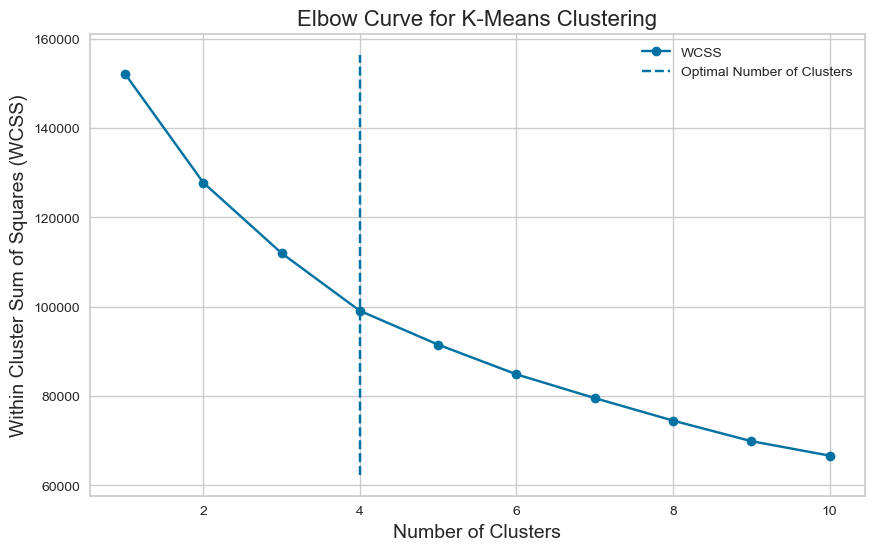

In [14]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Create a function to plot the elbow curve
def plot_elbow_curve(data, max_clusters=10):
    # Determine the optimal number of clusters
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=20)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    # Determine the optimal number of clusters using kneed library
    knee = KneeLocator(range(1, max_clusters + 1), wcss, curve='convex', direction='decreasing')
    optimal_clusters = knee.elbow
    
    # Plot the elbow curve with the optimal number of clusters as a vertical line in the plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=14)
    plt.vlines(optimal_clusters, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.legend(['WCSS', 'Optimal Number of Clusters'])
    plt.title('Elbow Curve for K-Means Clustering', fontsize=16)
    plt.show()

# Plot the elbow curve
plot_elbow_curve(cluster_df_scaled)


From the elbow curve, we can see that the optimal number of clusters is 4.

In [15]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(cluster_df_scaled)

KMeans(n_clusters=4, random_state=42)

In [16]:
# Create a function to plot the clusters with distribution
def plot_clusters_with_distribution(data, labels, name=''):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot cluster scatterplot
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels + 1, ax=axes[0],
                    palette='tab10', legend='full')
    axes[0].set_xlabel('PC1', fontweight='bold')
    axes[0].set_ylabel('PC2', fontweight='bold')
    axes[0].set_title(f'2D PCA Visualization for {name} Clustering', fontweight='bold', fontsize=14)

    # Plot cluster distribution
    sns.countplot(x=labels + 1, ax=axes[1], palette='tab10')
    axes[1].set_xlabel('Cluster', fontweight='bold')
    axes[1].set_ylabel('Count', fontweight='bold')
    axes[1].set_title('Cluster Distribution', fontweight='bold', fontsize=14)
    axes[1].bar_label(axes[1].containers[0])
    plt.tight_layout()
    plt.show()

# Create a function to plot the clusters distribution with pie chart
def plot_clusters_distribution_pie(labels):
    # Count the number of data points in each cluster
    cluster_counts = pd.Series(labels).value_counts().sort_index()
    # Labels for the pie chart
    labels = [f'Cluster {i+1}' for i in range(len(cluster_counts))]
    # Create the pie chart
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(cluster_counts,
           wedgeprops=dict(edgecolor='gray', linewidth=1),
           explode=[0.03]*len(cluster_counts),
           colors=sns.color_palette('tab10', len(cluster_counts)),
           textprops=dict(color='white', weight='bold', size=14),
           counterclock=False,
           startangle=180,
           labels=cluster_counts.index,
           autopct='%1.1f%%',
           pctdistance=0.7
           )
    
    # Add a title
    ax.set_title('Cluster Distribution', fontweight='bold', fontsize=14)

    # Add legend
    ax.legend(
        loc='upper right',
        # bbox_to_anchor=(1, 0.5),
        labels=labels
        )

    # Show the plot
    plt.show()

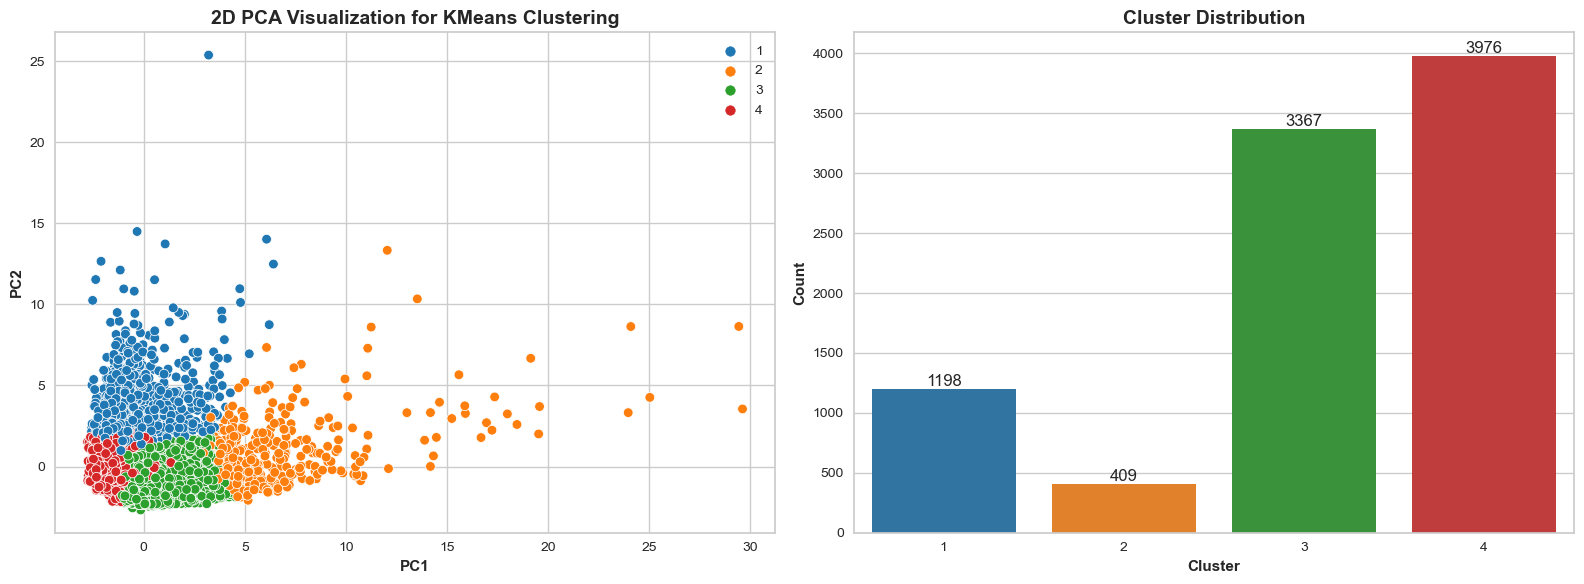

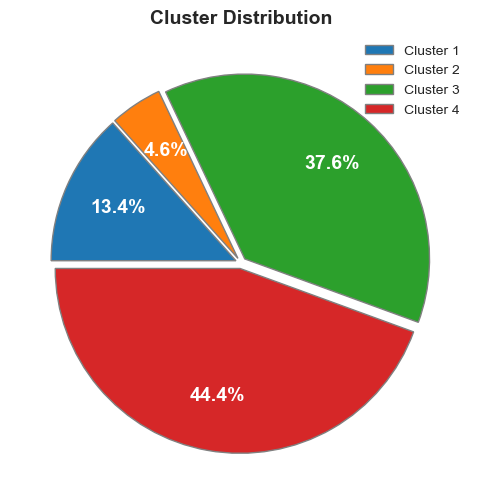

In [17]:
# Apply PCA to reduce the dimensionality for better visualization
from sklearn.decomposition import PCA
import seaborn as sns
# Apply PCA
pca = PCA()
cluster_df_pca = pca.fit_transform(cluster_df_scaled)[:, :2]

# # Convert the standardized array back to a DataFrame
# cluster_df_pca = pd.DataFrame(cluster_df_pca, columns=['PC1', 'PC2'])
# cluster_df_pca.head()

# Plot the clusters with distribution
plot_clusters_with_distribution(cluster_df_pca, kmeans.labels_, name='KMeans')

# Plot the clusters distribution with pie chart
plot_clusters_distribution_pie(kmeans.labels_)

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27289117, 0.47585551, 0.56380546, 0.6386369 , 0.70125615,
       0.75875927, 0.80762962, 0.85019516, 0.88849581, 0.91929605,
       0.9430129 , 0.96075671, 0.97502286, 0.9871975 , 0.99732923,
       0.99999931, 1.        ])

- Adding cumsum values for PC1 and PC2, we can see that the first two principal components account for 0.4758555 (47.59%) of the explained variance.
- From the first figure, we can see that the borderline between the clusters is not clearly visible but we still see some clusters.

# Multivariate Analysis + Clustering Results

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


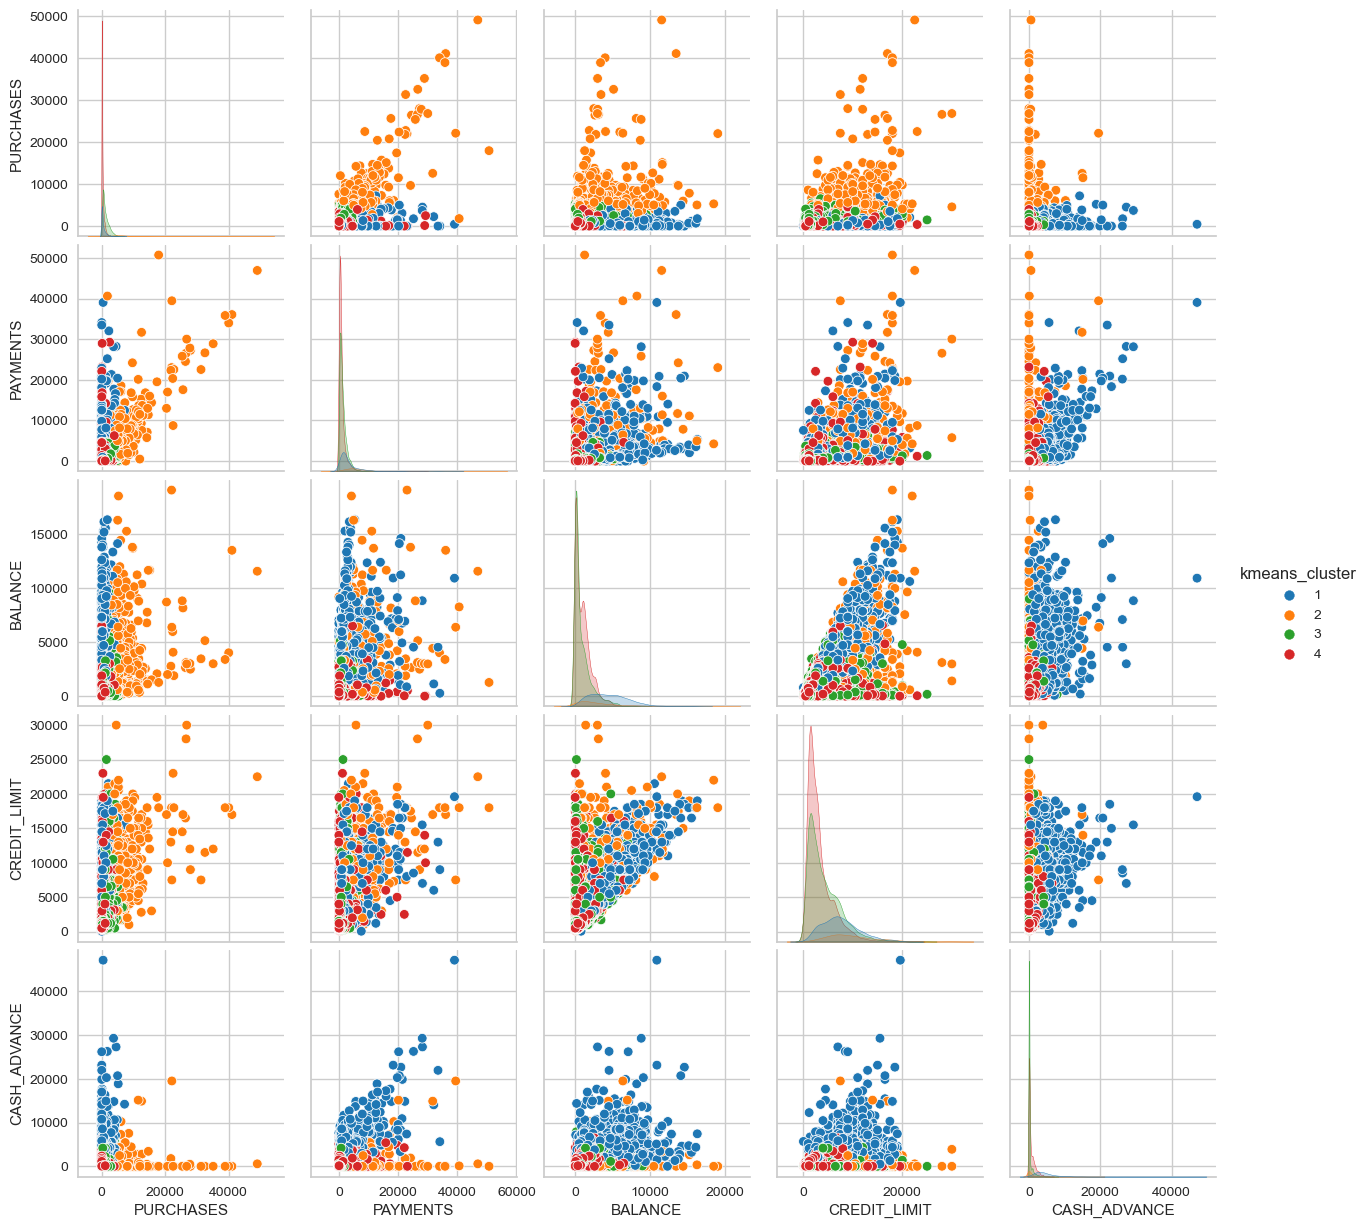

In [19]:
cluster_df['kmeans_cluster'] = kmeans.labels_ + 1

# using pairplot we'll visualize the attributes pairwise relationship in a grid format from seaborn
sns.pairplot(cluster_df[['PURCHASES','PAYMENTS','BALANCE','CREDIT_LIMIT','CASH_ADVANCE', 'kmeans_cluster']], hue='kmeans_cluster', palette='tab10')
plt.show()


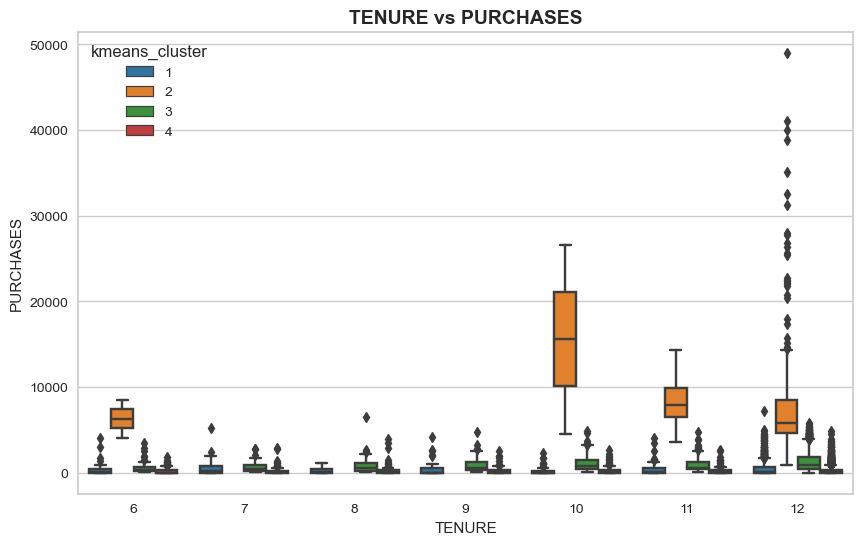

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=cluster_df, x='TENURE', y='PURCHASES', hue='kmeans_cluster', palette='tab10')
plt.title('TENURE vs PURCHASES', fontweight='bold', fontsize=14)
plt.show()

- From the above, we can conclude that the customers in the cluster 1 are more likely to spend more on purchases than in the other clusters.
- The other clusters tend to spend less on purchases, and they are more focused on different frequencies of other factors.

In [21]:
temp = cluster_df.groupby('kmeans_cluster').agg({'PURCHASES': 'mean', 'PAYMENTS': 'mean', 'BALANCE': 'mean', 'CREDIT_LIMIT': 'mean', 'CASH_ADVANCE': 'mean'})
temp.head()

,PURCHASES,PAYMENTS,BALANCE,CREDIT_LIMIT,CASH_ADVANCE
kmeans_cluster,,,,,
1,501.896219,3481.145990,4602.462714,7546.957050,4520.724309
2,7681.620098,7288.739497,3551.153761,9696.943765,653.638891
3,1236.178934,1332.194205,894.907458,4213.207678,210.570626
4,269.973466,974.505090,1011.751528,3277.352448,595.759339


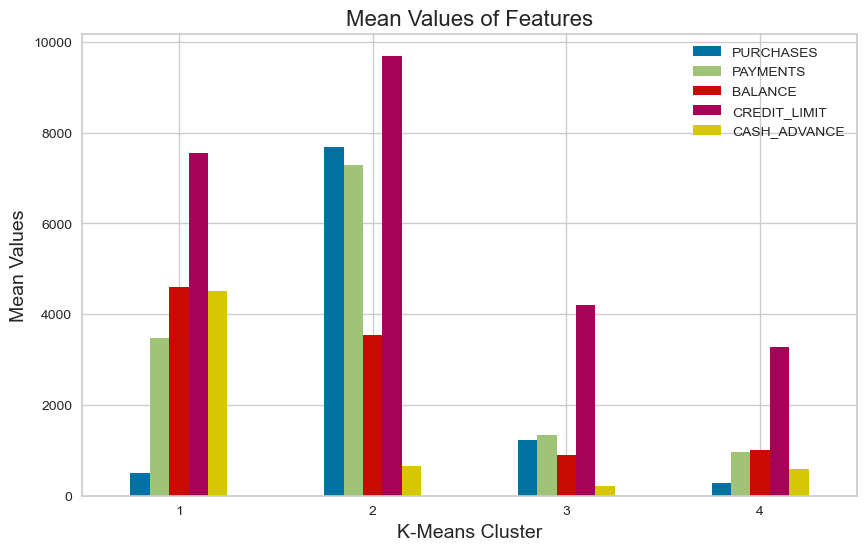

In [22]:
# Plot the mean values
temp.plot(kind='bar', figsize=(10, 6))
plt.xlabel('K-Means Cluster', fontsize=14)
plt.ylabel('Mean Values', fontsize=14)
plt.xticks(rotation=0)
plt.title('Mean Values of Features', fontsize=16)
plt.show()

- We can see that the cluster 2 are more likely to spend a lot more on purchases than in the other clusters, and have the highest credit limit but the lowest cash advance.
- The clusters 3 and 4 have the lowest credit limit, also have the lowest balance and cash advance.
- Clusters 1 has the highest cash advance, a lot more than other clusters (above 4000 while others below 1000).

=> We can conduct a marketing campaign to attract more customers in the cluster 1 to spend more on purchases and reduce cash advance.

# Combining PCA and K-Means Clustering

In [23]:
# Create function for plotting scree plot
def scree_plot(pca, xlabels):
    # Create scree plot
    fig, ax = plt.subplots(figsize=(12, 8))
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    # Cumulative explained variance ratio
    cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)
    # Labels
    xticks = range(1, len(explained_variance_ratio) + 1)
    # Plot
    ax.bar(xticks, explained_variance_ratio),
    ax.plot(xticks,
            cum_explained_variance_ratio,
            marker='o', color='black')
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_xlabel('Principal Components', fontsize=14)
    ax.set_ylabel('Cumulative Explained Variance Ratio', fontsize=14)
    ax.set_title('Scree Plot', fontsize=16)
    ax.legend(['Explained Variance Ratio', 'Cumulative Explained Variance Ratio'])
    plt.grid(True)

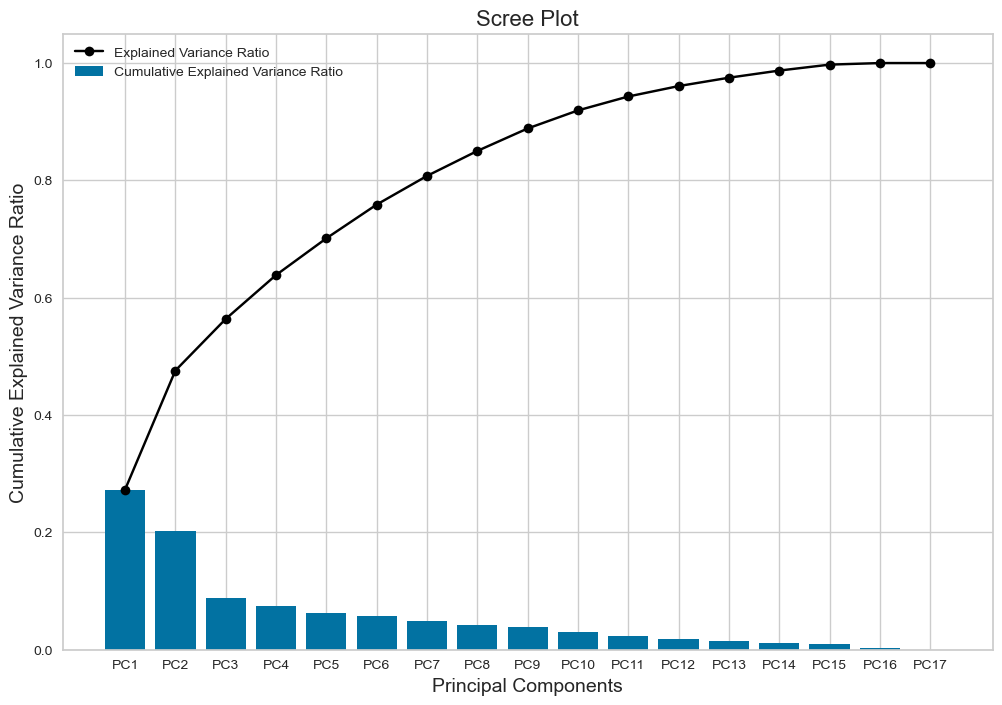

In [24]:
# Scree plot
scree_plot(pca, ['PC' + str(i) for i in range(1, len(pca.components_) + 1)])

In [25]:
# Apply PCA with 5 dimensions
pca_transformed_5d = pca.transform(cluster_df_scaled)[:, :5]
pca_transformed_5d.shape

(8950, 5)

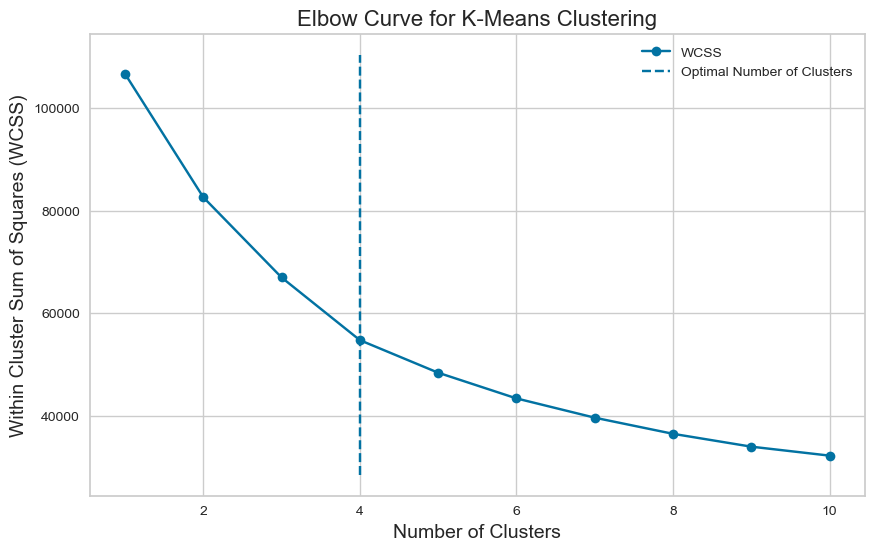

In [26]:
# Plot the elbow curve
plot_elbow_curve(pca_transformed_5d)

In [27]:
# Instantiate the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=20)
kmeans.fit(pca_transformed_5d)

KMeans(n_clusters=4, n_init=20, random_state=42)

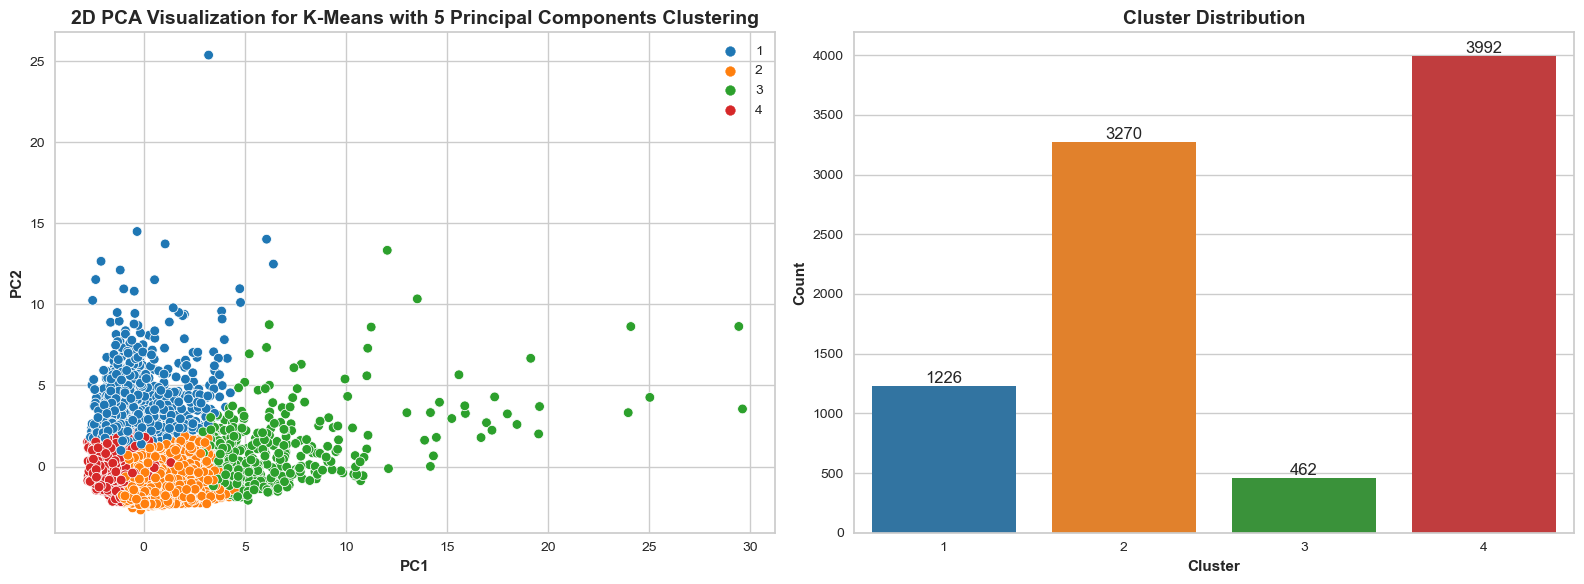

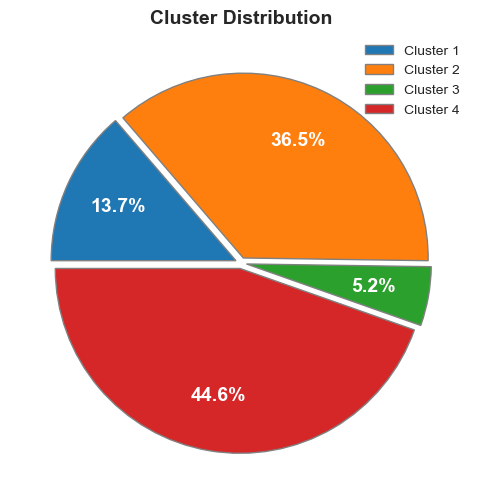

In [28]:
# Plot the clusters
plot_clusters_with_distribution(pca_transformed_5d, kmeans.labels_, 'K-Means with 5 Principal Components')

# Plot the clusters distribution with pie chart
plot_clusters_distribution_pie(kmeans.labels_)

In [29]:
# Add the cluster labels to the original dataframe
cluster_df['kmeans_cluster_5d'] = kmeans.labels_ + 1
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster,kmeans_cluster_5d
CUST_ID,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4,4
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,1
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,2
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12,4,4
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4,4


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


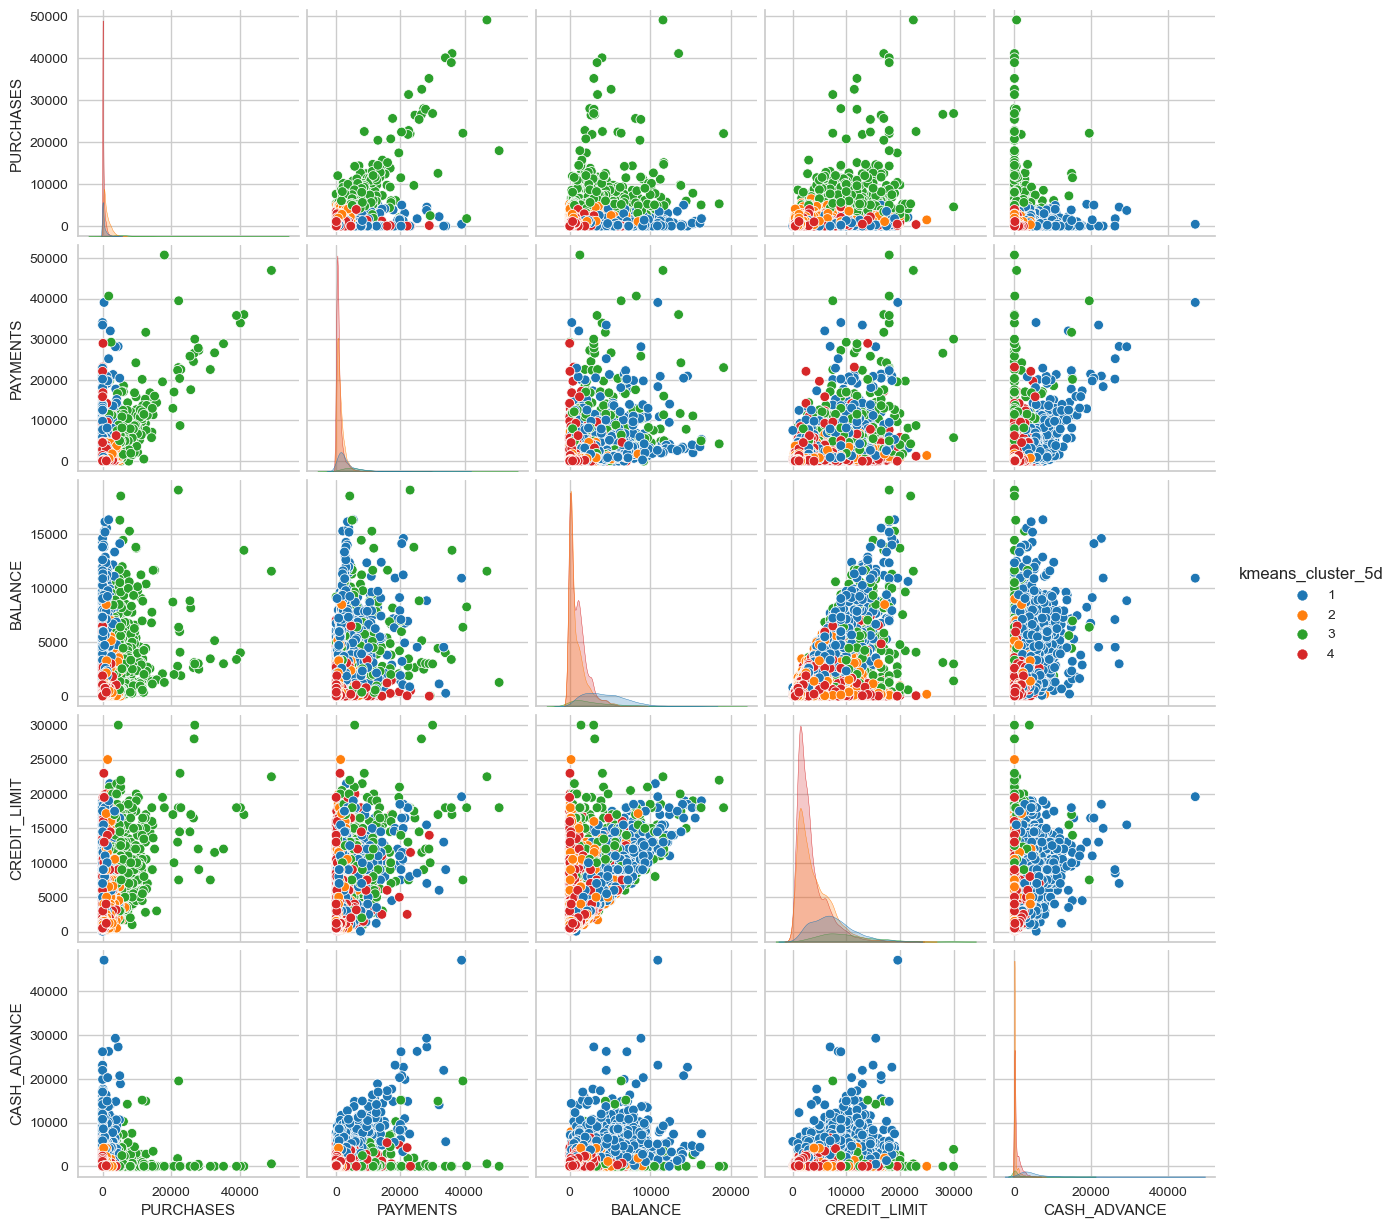

In [30]:
# using pairplot we'll visualize the attributes pairwise relationship in a grid format from seaborn
sns.pairplot(cluster_df[['PURCHASES','PAYMENTS','BALANCE','CREDIT_LIMIT','CASH_ADVANCE', 'kmeans_cluster_5d']], hue='kmeans_cluster_5d', palette='tab10')
plt.show()

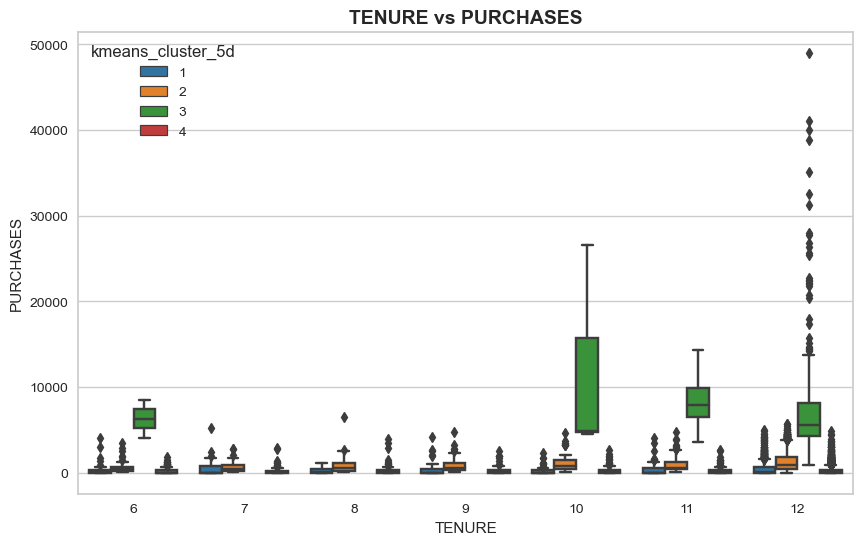

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=cluster_df, x='TENURE', y='PURCHASES', hue='kmeans_cluster_5d', palette='tab10')
plt.title('TENURE vs PURCHASES', fontweight='bold', fontsize=14)
plt.show()

In [32]:
temp2 = cluster_df.groupby('kmeans_cluster_5d').agg({'PURCHASES': 'mean', 'PAYMENTS': 'mean', 'BALANCE': 'mean', 'CREDIT_LIMIT': 'mean', 'CASH_ADVANCE': 'mean'})
temp2.head()

,PURCHASES,PAYMENTS,BALANCE,CREDIT_LIMIT,CASH_ADVANCE
kmeans_cluster_5d,,,,,
1,466.820987,3416.453277,4474.837370,7323.494735,4468.661653
2,1209.256086,1289.111705,888.620044,4074.042891,209.392911
3,7241.572403,7053.799034,3401.117931,9784.740260,689.765098
4,277.176072,964.132096,1011.722210,3357.378090,570.874493


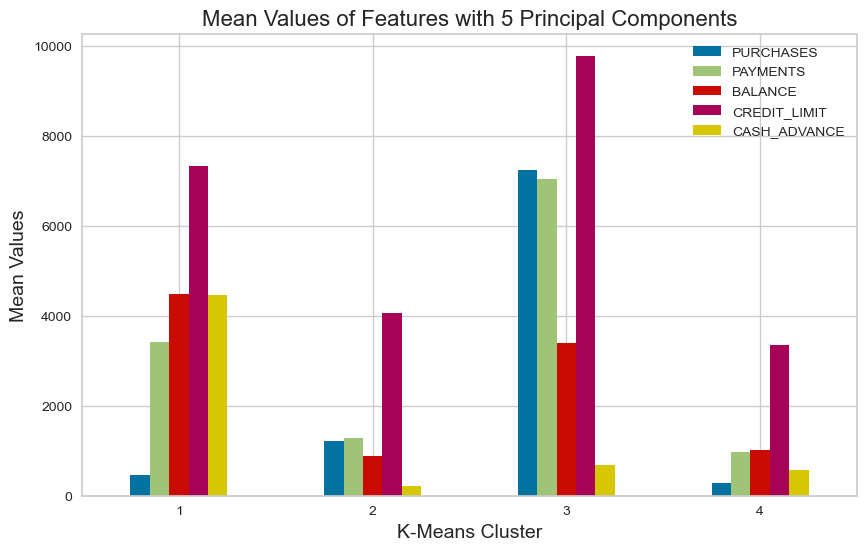

In [33]:
# Plot the mean values
temp2.plot(kind='bar', figsize=(10, 6))
plt.xlabel('K-Means Cluster', fontsize=14)
plt.ylabel('Mean Values', fontsize=14)
plt.xticks(rotation=0)
plt.title('Mean Values of Features with 5 Principal Components', fontsize=16)
plt.show()

- Cluster 3 has the highest purchases, payments, and credit limit.
- Cluster 1 has the highest cash advance, a lot more than other clusters (above 4000 while others below 1000) but purchases are much lower.
- Clusters 2 and 4 have relatively low purchases, payments, balance, and cash advance.

=> Cluster 1 in this case is similar to cluster 1 in the previous case, and cluster 3 looks like cluster 2 in the previous case.

# Conclusion of K-Means Clustering with and without PCA

### - In general, there are still 2 clusters that we can consider. One segment of customers with high purchases, payments, and credit limit; the other segment of customers with low purchases but very high in cash advance. From these observation, we can conduct suitable marketing campaigns to attract these customers or have some other strategies to approach users with low purchases and reduce cash advance.

# DBSCAN Clustering

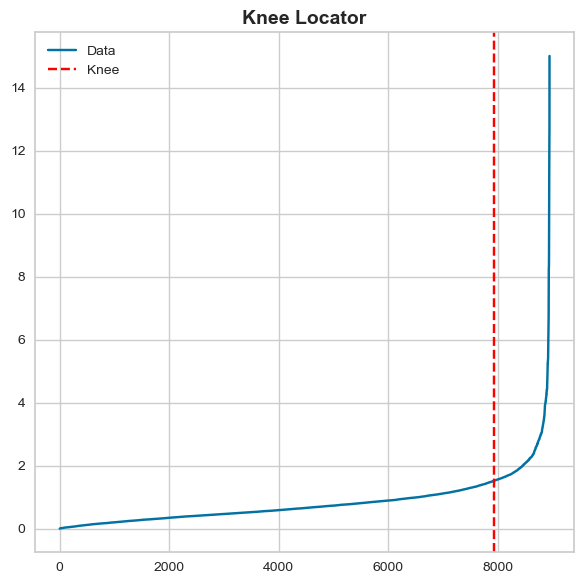

Optimal eps value: 1.5212310104912372


In [34]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
# Create a function to find the optimal eps value
def knee_optimal_eps(data, min_samples):
    neigh = NearestNeighbors(n_neighbors=min_samples)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(i, distances)
    ax.axvline(x=knee.knee, color='red', linestyle='--')
    ax.set_title('Knee Locator', fontweight='bold', fontsize=14)
    ax.legend(['Data', 'Knee'])
    plt.tight_layout()
    plt.show()
    return distances[knee.knee]

# Find the optimal eps value
eps = knee_optimal_eps(cluster_df_scaled.to_numpy(), 2*len(cluster_df_scaled.columns))
print(f'Optimal eps value: {eps}')

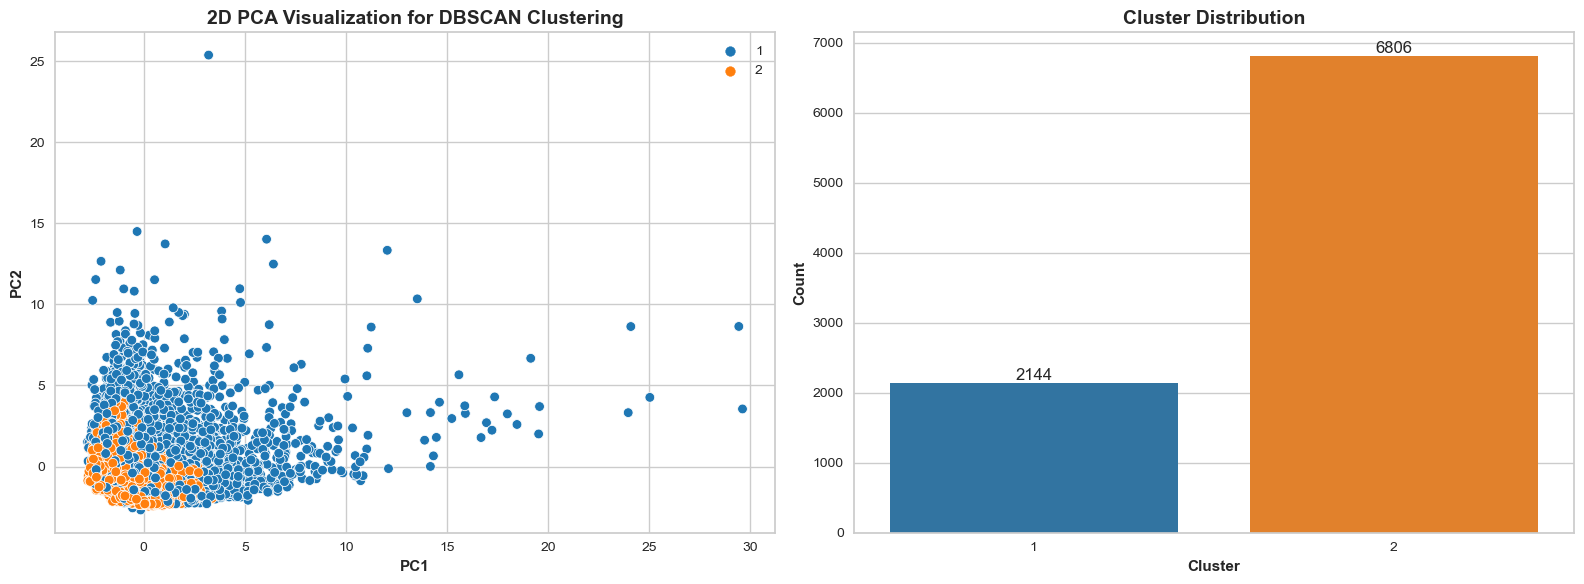

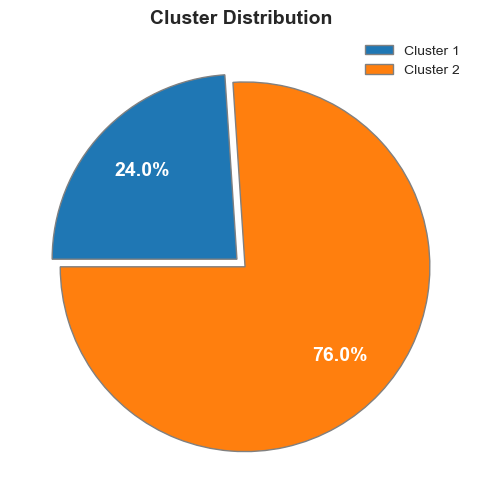

In [35]:
from sklearn.cluster import DBSCAN

# Create the DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=2*len(cluster_df_scaled.columns))

# Fit the model
dbscan.fit(cluster_df_scaled)

# Get the labels
cluster_df['dbscan_cluster'] = dbscan.labels_ + 1

# Plot the clusters
plot_clusters_with_distribution(cluster_df_pca, dbscan.labels_ + 1, 'DBSCAN')

# Plot the clusters distribution with pie chart
plot_clusters_distribution_pie(dbscan.labels_ + 1)

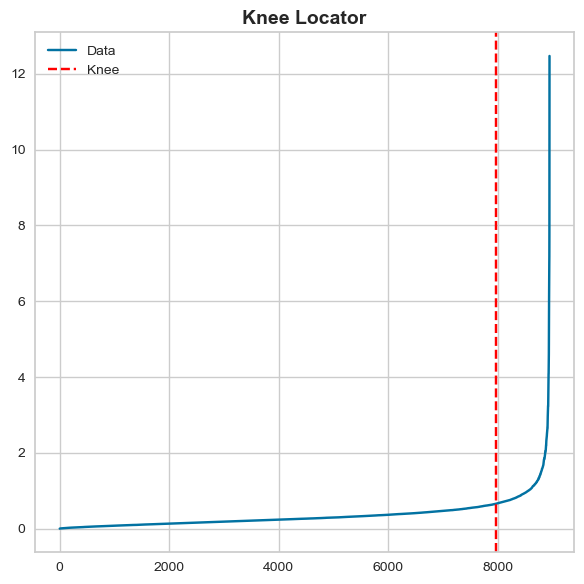

Optimal eps value: 0.658355142181448


In [36]:
eps_pca = knee_optimal_eps(pca_transformed_5d, 2*pca_transformed_5d.shape[1])
print(f'Optimal eps value: {eps_pca}')

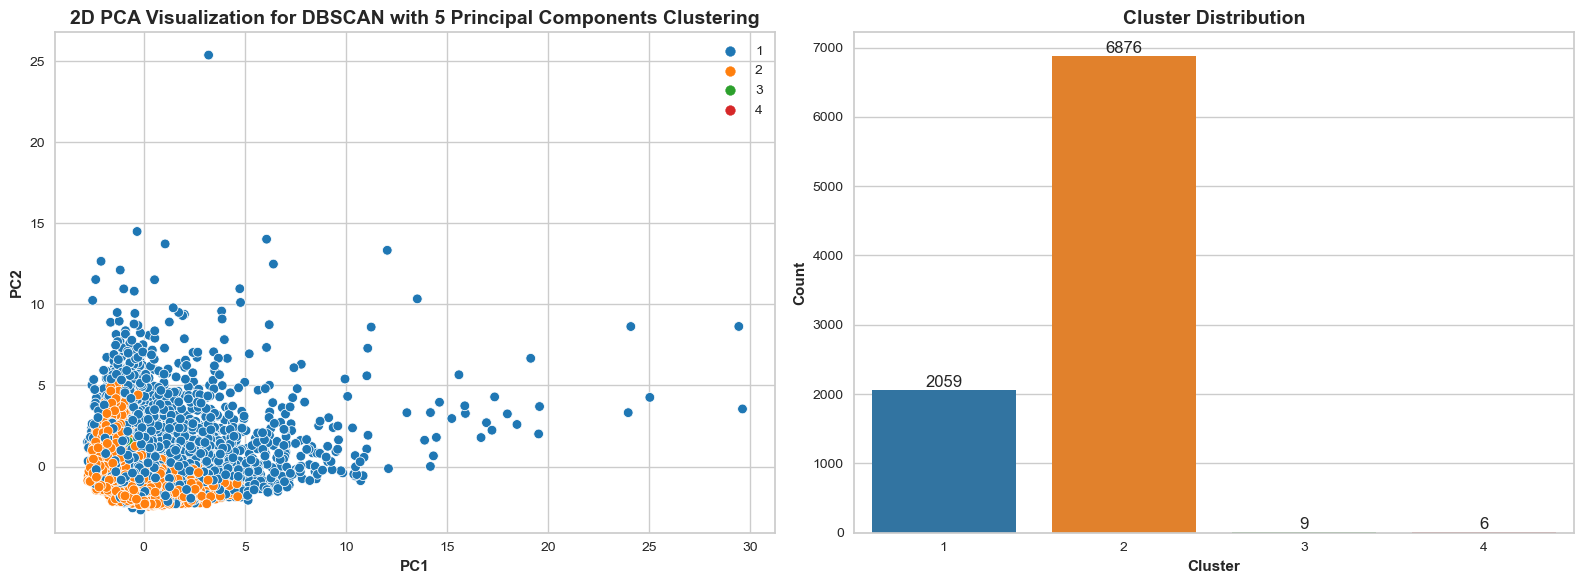

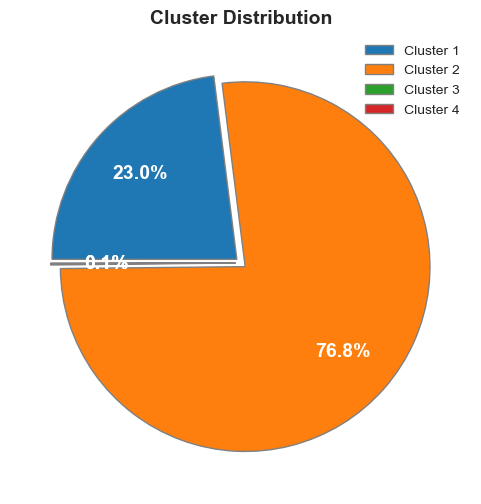

In [37]:
# Create the DBSCAN model
dbscan_pca = DBSCAN(eps=eps_pca, min_samples=2*pca_transformed_5d.shape[1])

# Fit the model
dbscan_pca.fit(pca_transformed_5d)

# Get the labels
cluster_df['dbscan_cluster_pca'] = dbscan_pca.labels_ + 1

# Plot the clusters
plot_clusters_with_distribution(pca_transformed_5d, dbscan_pca.labels_ + 1, 'DBSCAN with 5 Principal Components')
# Plot the clusters distribution with pie chart
plot_clusters_distribution_pie(dbscan_pca.labels_ + 1)

### - From the results of DBSCAN clustering with and without PCA, we still see 2 main clusters in imbalanced data. Cluster 1 is the noise data coming from DBSCAN algorithm, and cluster 2 is the main cluster of the data.
### - DBSCAN algorithm is not able to distinguish the clusters in the data. Therefore, we can not conclude that there are 2 clusters in this case.